In [150]:
import numpy as np #mnist는 numpy로 저장되어 있음
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms  
#torchvision은 pytorch에서 이미지 및 비디오 데이터셋을 로드하는 패키지


In [151]:
! pip install torchvision

In [152]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'  # matplotlib.pyplot 사용 커널 충돌방지

In [153]:
mnist_train = datasets.MNIST(root='MNIST_data', train=True, download=True
                             , transform=transforms.Compose([transforms.ToTensor()]))

In [154]:
mnist_test = datasets.MNIST(root='MNIST_data', train=False, download=True
                             , transform=transforms.Compose([transforms.ToTensor()]))


In [155]:
print(mnist_train)
print(mnist_test)

Dataset MNIST
    Number of datapoints: 60000
    Root location: MNIST_data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )
Dataset MNIST
    Number of datapoints: 10000
    Root location: MNIST_data
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
           )


In [156]:
def plot(x):
    img = (np.array(x.detach(), dtype='float')).reshape(28,28)
    plt.imshow(img, cmap='gray')
    plt.show()

In [157]:
mnist_train.data[0]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

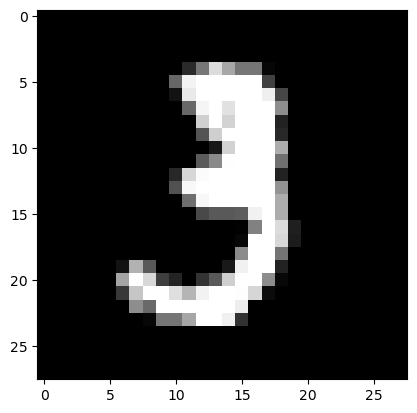

In [158]:
plot(mnist_train.data[10])

In [159]:
print (mnist_train.targets[10])
print(mnist_train.targets.shape)
print(mnist_train.data.shape)

tensor(3)
torch.Size([60000])
torch.Size([60000, 28, 28])


In [160]:
x = mnist_train.data.float() / 255 # 0~1사이로 스케일 조정
#x[0]
y = mnist_train.targets
#y[:10]

print(x.size()) #딥러닝에 활용하려면 1차원이 되어야 함. 변경 필요
print(y.size())
x = x.view(x.size(0), -1) # 2차원에서 1차원으로 변경

input_size = x.size(-1) # size(-1)은 마지막 차원의 크기를 반환
print(input_size)
output_size = int(max(y)) + 1 #가장 큰 y값에 1을 더해줌
print(output_size)

torch.Size([60000, 28, 28])
torch.Size([60000])
784
10


In [161]:
#훈련데이터(train)와 검증데이터(valid) 분리
ratio = [0.8, 0.2] #훈련데이터 80%, 검증데이터 20%로 분리
train_cnt = (x.size(0) * ratio[0]) #훈련데이터 개수
valid_cnt = (x.size(0) * ratio[1]) #검증데이터 개수
test_cnt = len(mnist_test.data) #테스트데이터 개수

print(train_cnt, valid_cnt, test_cnt)

cnts = [int(train_cnt), int(valid_cnt)]
indices = torch.randperm(x.size(0)) #데이터 인덱스 섞기

 #print(indices[0:20])

x = torch.index_select(x, dim=0, index=indices)
y = torch.index_select(y, dim=0, index=indices)



x1 = list(x.split(cnts, dim=0))
y1 = list(y.split(cnts, dim=0))

print(x1[0].shape, x1[1].shape)
print(y1[0].shape, x1[1].shape)

x1 += [(mnist_test.data.float() / 255).view(test_cnt, -1)]
y1 += [mnist_test.targets]

for ii in x1:
    print(ii.shape)
    
for yi in y1:
    print(yi.shape)




48000.0 12000.0 10000
torch.Size([48000, 784]) torch.Size([12000, 784])
torch.Size([48000]) torch.Size([12000, 784])
torch.Size([48000, 784])
torch.Size([12000, 784])
torch.Size([10000, 784])
torch.Size([48000])
torch.Size([12000])
torch.Size([10000])


In [162]:
model = nn.Sequential(
    nn.Linear(input_size, 512),
    nn.LeakyReLU(),
    nn.Linear(512, 300),
    nn.LeakyReLU(),
    nn.Linear(300, 400),
    nn.LeakyReLU(),
    nn.Linear(400, 200),
    nn.LeakyReLU(),
    nn.Linear(200, 100),
    nn.LeakyReLU(),
    nn.Linear(100, 50),
    nn.LeakyReLU(),
    nn.Linear(50, output_size),
    nn.LogSoftmax(dim=-1)
)
model

Sequential(
  (0): Linear(in_features=784, out_features=512, bias=True)
  (1): LeakyReLU(negative_slope=0.01)
  (2): Linear(in_features=512, out_features=300, bias=True)
  (3): LeakyReLU(negative_slope=0.01)
  (4): Linear(in_features=300, out_features=400, bias=True)
  (5): LeakyReLU(negative_slope=0.01)
  (6): Linear(in_features=400, out_features=200, bias=True)
  (7): LeakyReLU(negative_slope=0.01)
  (8): Linear(in_features=200, out_features=100, bias=True)
  (9): LeakyReLU(negative_slope=0.01)
  (10): Linear(in_features=100, out_features=50, bias=True)
  (11): LeakyReLU(negative_slope=0.01)
  (12): Linear(in_features=50, out_features=10, bias=True)
  (13): LogSoftmax(dim=-1)
)

In [163]:
crit = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

In [164]:
device = torch.device('cpu')
if torch.cuda.is_available():
    device = torch.device('cuda')

In [165]:
model = model.to(device)
x2 = [x_i.to(device) for x_i in x1]
y2 = [y_i.to(device) for y_i in y1]

In [166]:
epochs = 1000
batch_size = 256 #특정 크기만큼 데이터를 읽어들임
print_interval = 10

In [167]:
from copy import deepcopy #모델 저장을 위해
lowest_loss = np.inf #최소 loss값을 저장하기 위한 변수
best_model = None

early_stop = 50 #50번 이상 loss가 감소하지 않으면 학습 중단
lowest_epoch = np.inf #최소 epoch값을 저장하기 위한 변수

In [168]:
y2[:10] #현재 1차원인데 밑에서는 텐서를 쓰므로 2차원으로 변경해줘야 함

[tensor([8, 0, 8,  ..., 3, 1, 4]),
 tensor([0, 3, 4,  ..., 8, 2, 9]),
 tensor([7, 2, 1,  ..., 4, 5, 6])]

In [ ]:
train_history, valid_history = [], []

for i in range(epochs):
    indices = torch.randperm(x2[0].size(0)).to(device)
    x_ = torch.index_select(x2[0], dim=0, index=indices)
    y_ = torch.index_select(y2[0], dim=0, index=indices)
    
    x_ = x_.split(batch_size, dim=0)
    y_ = y_.split(batch_size, dim=0)
    
    train_loss, valid_loss = 0, 0
    y_hat = [] #데이터가 커서 batch로 자르기 때문에 y_hat을 저장하기 위한 리스트
    
    for x_i, y_i in zip(x_, y_): #zip은 두 개의 리스트를 하나로 묶어줌
        y_hat_i = model(x_i)
        loss = crit(y_hat_i, y_i.squeeze()) #y_i를 2차원으로 변경
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += float(loss) #하나가 끝나면 loss를 더해줌
        
    train_loss = train_loss / len(x_) # for문이 끝날 때마다 loss를 데이터 개수로 나눠줌
                                        # len(x_) = 4800/256
    with torch.no_grad(): #기울기 미분을 하지 않는다는 뜻
        x_ = x2[1].split(batch_size, dim=0) #검증데이터도 batch로 자름
        y_ = y2[1].split(batch_size, dim=0)
        
        valid_loss = 0
        
        for x_i, y_i in zip(x_, y_):
            y_hat_i = model(x_i)
            loss = crit(y_hat_i, y_i)
            valid_loss += float(loss)
            
            y_hat += [y_hat_i]
            
    valid_loss = valid_loss / len(x_i)
    
    train_history += [train_loss]
    valid_history += [valid_loss]
    
    if (i + 1) % print_interval == 0:
        print(i, train_loss, valid_loss, lowest_loss)
    
    if valid_loss <= lowest_loss:
        lowest_loss = valid_loss
        lowest_epoch = i
        best_model = deepcopy(model.state_dict())

KeyboardInterrupt: 